# Projekat I

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
import seaborn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('updated_pollution_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [3]:
df.drop_duplicates(keep='first',inplace=True)
df.isnull().any()

Temperature                      False
Humidity                         False
PM2.5                            False
PM10                             False
NO2                              False
SO2                              False
CO                               False
Proximity_to_Industrial_Areas    False
Population_Density               False
Air Quality                      False
dtype: bool

Dataset nema duplikata ni nedostajućih vrednosti

### Description of parameters
- Temperature (°C): Average temperature of the region.
- Humidity (%): Relative humidity recorded in the region.
- PM2.5 Concentration (µg/m³): Fine particulate matter levels.
- PM10 Concentration (µg/m³): Coarse particulate matter levels.
- NO2 Concentration (ppb): Nitrogen dioxide levels.
- SO2 Concentration (ppb): Sulfur dioxide levels.
- CO Concentration (ppm): Carbon monoxide levels.
- Proximity to Industrial Areas (km): Distance to the nearest industrial zone.
- Population Density (people/km²): Number of people per square kilometer in the region
### Air Quality Levels
* Good: Clean air with low pollution levels.
* Moderate: Acceptable air quality but with some pollutants present.
* Poor: Noticeable pollution that may cause health issues for sensitive groups.
* Hazardous: Highly polluted air posing serious health risks to the population.

In [4]:
encoder = LabelEncoder()
df['Air Quality'] = encoder.fit_transform(df['Air Quality'])
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0


In [5]:
print(encoder.classes_)

['Good' 'Hazardous' 'Moderate' 'Poor']


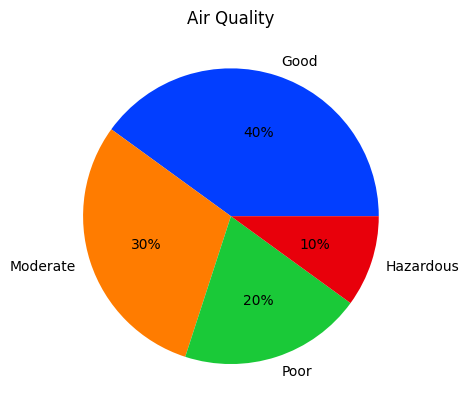

In [6]:
air_quality=df['Air Quality'].value_counts()
palette_color = seaborn.color_palette('bright') #Seaborn paleta boja 
plt.pie(air_quality.values, labels=encoder.inverse_transform(air_quality.index), colors=palette_color, autopct='%.0f%%')
plt.title("Air Quality") 
plt.show() 

<Axes: >

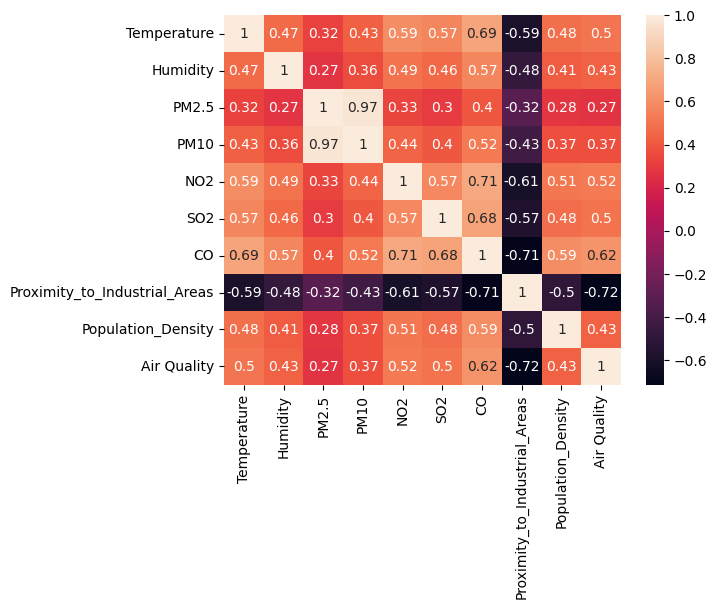

In [7]:
correlation=df.corr()
seaborn.heatmap(correlation,annot=True)

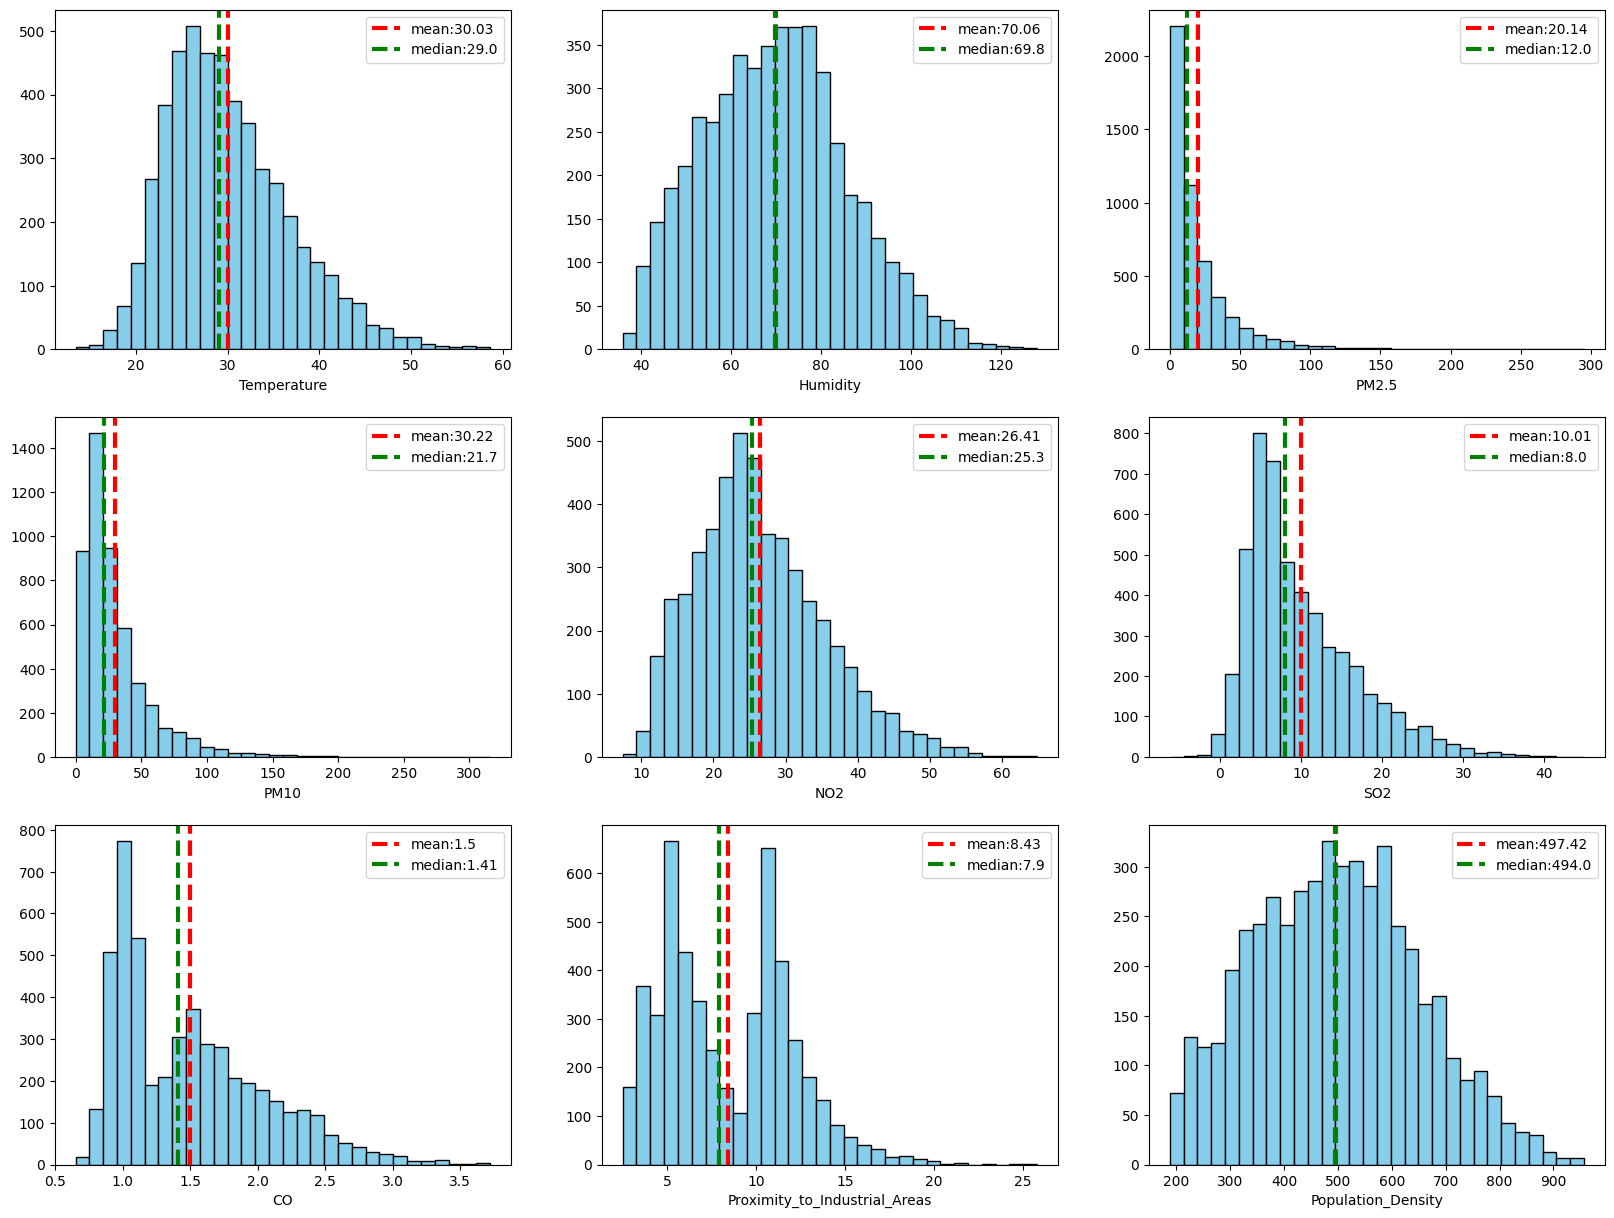

In [8]:
df_simpl=df.drop(columns='Air Quality')
plt.figure(figsize=(20,15))
for ind,col in enumerate(df_simpl.columns):
    plt.subplot(3,3,ind+1)
    plt.hist(df_simpl[col], bins=30, color='skyblue', edgecolor='black')
    plt.axvline(np.round(df[col].mean(),2), color='r', linestyle='dashed', linewidth=3)
    plt.axvline(np.round(df[col].median(),2), color='g', linestyle='dashed', linewidth=3)
    plt.xlabel(col)
    plt.legend([f'mean:{np.round(df[col].mean(),2)}',f'median:{np.round(df[col].median(),2)}'])
plt.show()

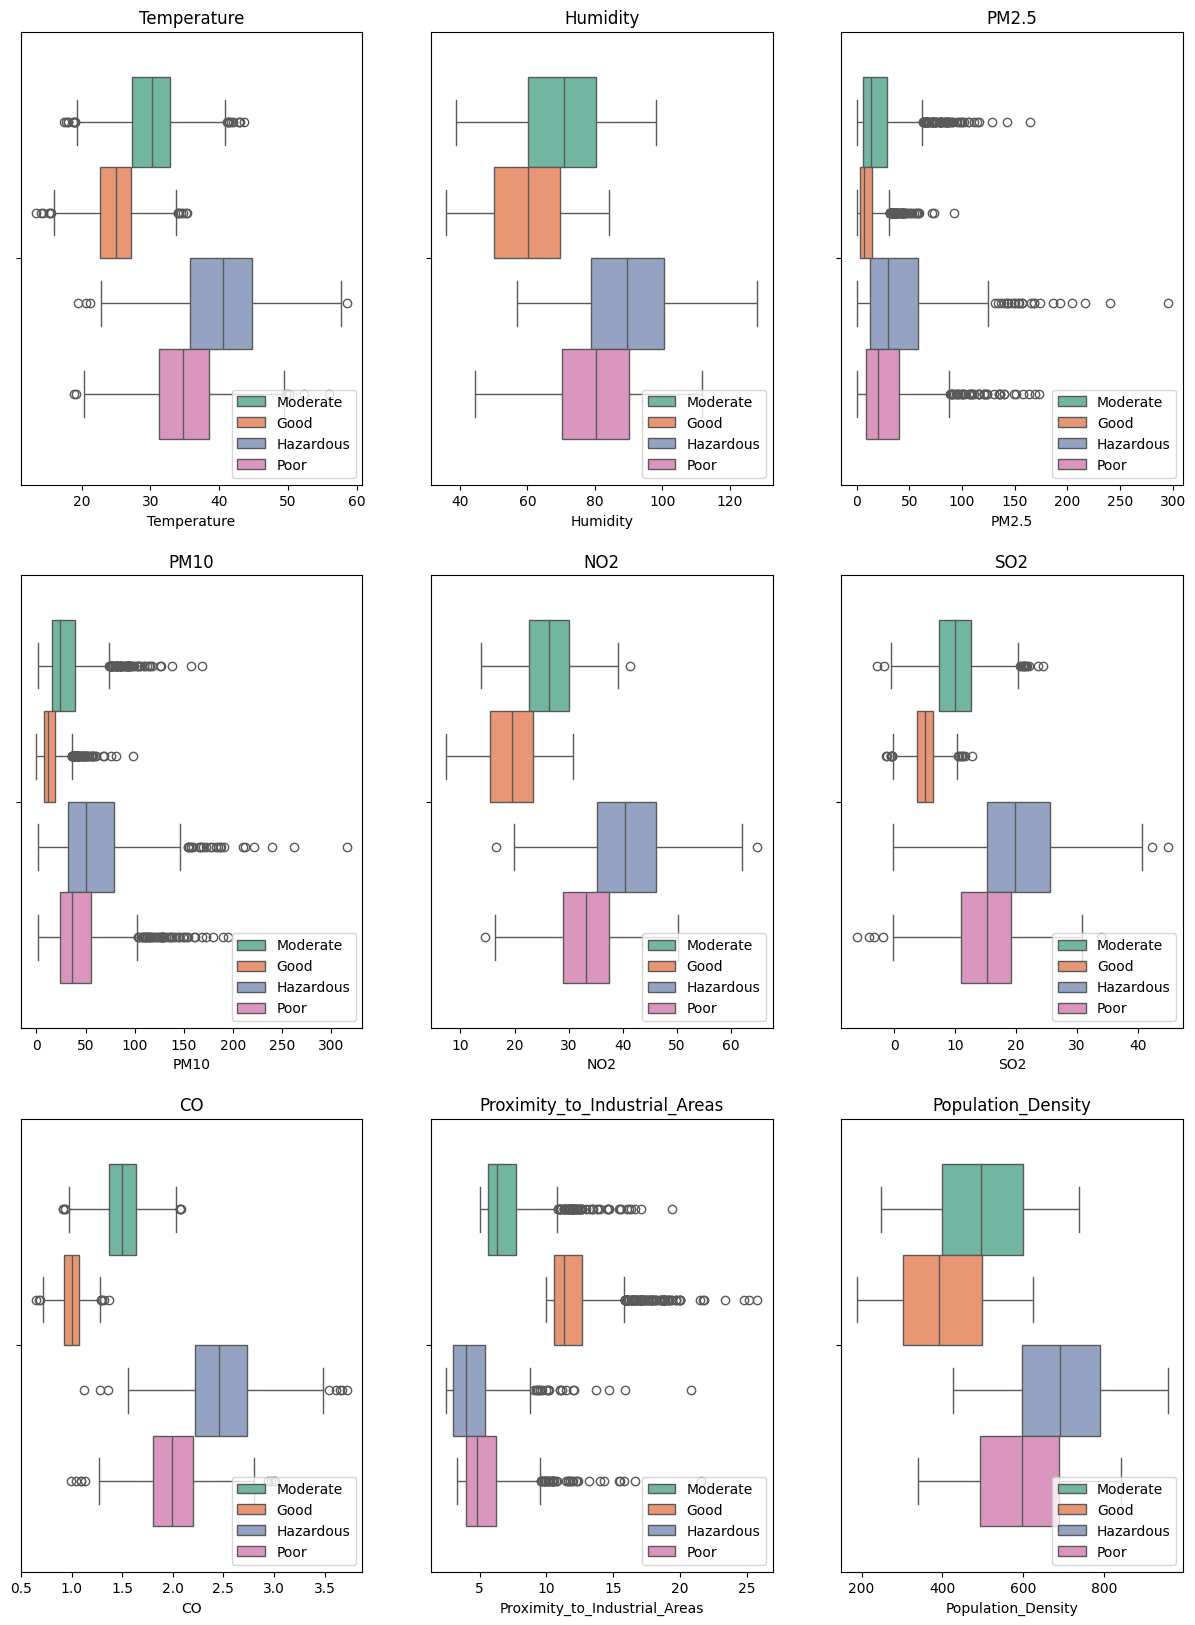

In [9]:
fig = plt.figure(figsize=(15,20))
for i, col in enumerate(df.drop('Air Quality', axis=1).columns):
  plt.subplot(3,3,i+1)
  seaborn.boxplot(x = df[col],hue=encoder.inverse_transform(df['Air Quality']),palette='Set2')
  plt.legend(loc='lower right')
  plt.title(col)

#### Outlier removal (IQR)

In [10]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800,1.300000
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084,1.187553
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000,0.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000,0.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000,1.500000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000,2.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000,3.000000


In [11]:
for col in df.columns:
    Q1=np.quantile(df[col],0.25)
    Q3=np.quantile(df[col],0.75)
    IQR=Q3-Q1
    low_lim=Q1-IQR*1.5
    up_lim=Q3+IQR*1.5
    df=df[(df[col]>=low_lim)&(df[col]<=up_lim)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4158 entries, 0 to 4998
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    4158 non-null   float64
 1   Humidity                       4158 non-null   float64
 2   PM2.5                          4158 non-null   float64
 3   PM10                           4158 non-null   float64
 4   NO2                            4158 non-null   float64
 5   SO2                            4158 non-null   float64
 6   CO                             4158 non-null   float64
 7   Proximity_to_Industrial_Areas  4158 non-null   float64
 8   Population_Density             4158 non-null   int64  
 9   Air Quality                    4158 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 357.3 KB


In [12]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
count,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000
mean,28.624291,67.458923,13.477321,22.153054,24.444877,8.417629,1.358680,9.002646,469.990620,1.194565
std,5.638813,14.604439,12.096149,14.047948,7.418979,5.023425,0.423952,3.419490,139.874008,1.202555
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000,0.000000
25%,24.500000,56.100000,3.900000,11.100000,19.000000,4.700000,1.010000,5.800000,362.000000,0.000000
50%,27.800000,67.500000,9.800000,18.600000,23.900000,7.100000,1.235000,10.100000,470.000000,2.000000
75%,32.100000,77.700000,19.600000,30.300000,29.100000,11.400000,1.650000,11.300000,573.000000,2.000000
max,47.300000,111.800000,56.600000,63.700000,46.700000,23.200000,2.630000,19.400000,861.000000,3.000000


#### Matrica konfuzije

In [13]:
from sklearn.metrics import confusion_matrix

def createConfusionMatrix(target_test,target_predicted):
    matrix = confusion_matrix(np.asarray(target_test),np.asarray(target_predicted))
    class_names=encoder.inverse_transform([0,1,2,3])
    dataframe=pd.DataFrame(matrix,index=class_names,columns=class_names)
    seaborn.heatmap(data=dataframe,annot=True,cbar=None,cmap='Blues',fmt='.0f')
    plt.title("Confusion Matrix"),plt.tight_layout()
    plt.ylabel("True class"), plt.xlabel("Predicted class")
    plt.show()

## Dummy Classification Model

R^2 score 0.3942307692307692


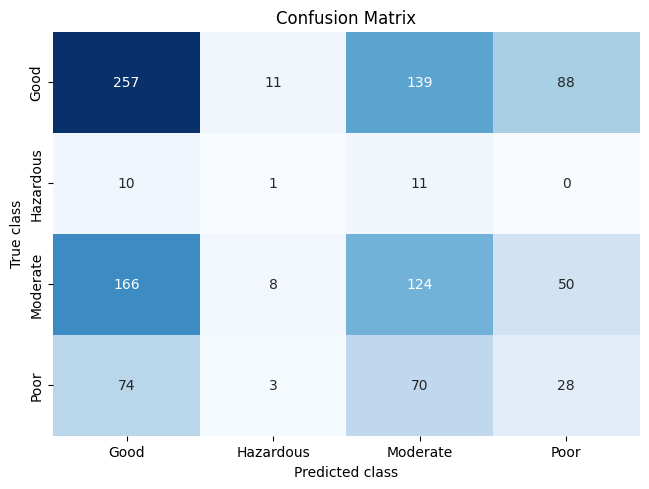

In [14]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

features,target=df.drop('Air Quality',axis=1),df['Air Quality']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target) #train_size 0.25
dummy=DummyClassifier(strategy='stratified',random_state=0)
target_predicted=dummy.fit(features_train,target_train).predict(features_test)
print("R^2 score",dummy.score(features_test,target_test))
createConfusionMatrix(target_test,target_predicted)

## Logistic regression

              precision    recall  f1-score   support

        Good       0.99      1.00      0.99       495
   Hazardous       0.82      0.41      0.55        22
    Moderate       0.93      0.97      0.95       348
        Poor       0.87      0.86      0.86       175

    accuracy                           0.95      1040
   macro avg       0.90      0.81      0.84      1040
weighted avg       0.95      0.95      0.95      1040



c:\Users\marko\anaconda3\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


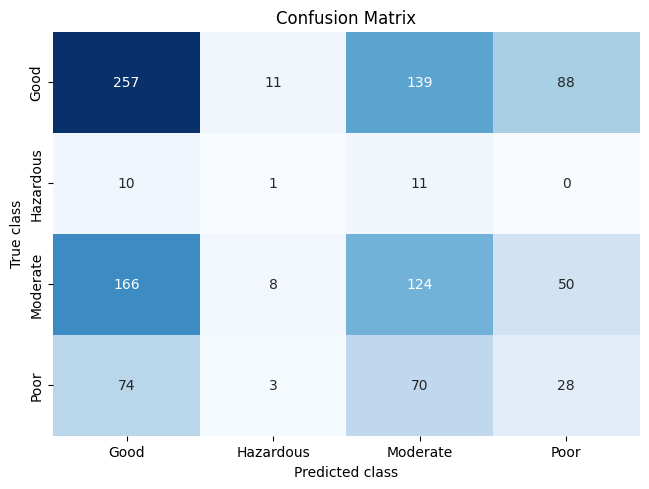

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target) 

# Fit logistic regression (multi-class)
model = LogisticRegression(solver='lbfgs', max_iter=10000,random_state=0)
model.fit(features_train, target_train)

# Predictions
y_pred = model.predict(features_test)

# Evaluation
print(classification_report(target_test, y_pred, target_names=encoder.classes_))
createConfusionMatrix(target_test,target_predicted)

Your data is dominated by Good and Moderate classes (especially Good).
A DummyClassifier with strategy 'most_frequent' (which always predicts the most common class) will already get quite high accuracy — because the dataset is imbalanced.

If logistic regression doesn’t actually learn meaningful feature relationships (e.g., due to:
* unscaled data,
* insufficient training data,
* features not predictive,

it can end up behaving like a dummy model — predicting mostly the majority class.

## Random forest model

Random Forest performance:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       495
   Hazardous       0.92      0.50      0.65        22
    Moderate       0.96      0.98      0.97       348
        Poor       0.90      0.92      0.91       175

    accuracy                           0.97      1040
   macro avg       0.94      0.85      0.88      1040
weighted avg       0.97      0.97      0.97      1040



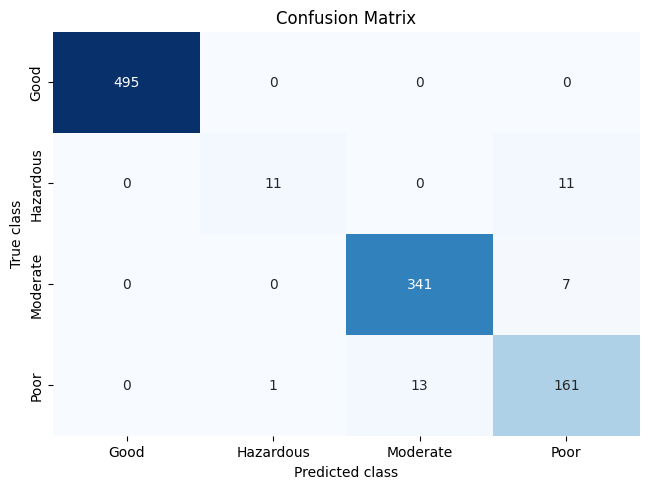

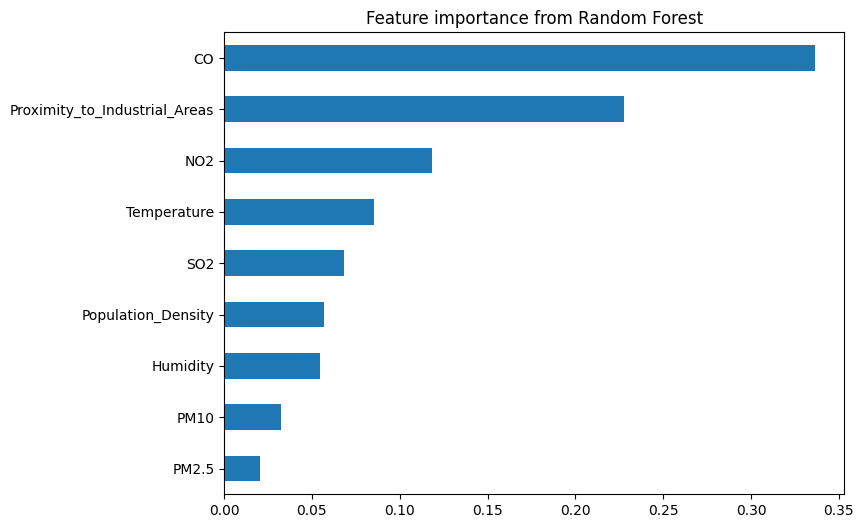

In [16]:
from sklearn.ensemble import RandomForestClassifier

features,target=df.drop('Air Quality',axis=1),df['Air Quality']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

rf = RandomForestClassifier(
    n_estimators=200,              # number of trees
    class_weight='balanced',       # handle imbalance
    random_state=0
)
rf.fit(features_train, target_train)
target_predicted = rf.predict(features_test)

print("Random Forest performance:")
print(classification_report(target_test, target_predicted, target_names=encoder.classes_))
createConfusionMatrix(target_test,target_predicted)

feat_importance = pd.Series(rf.feature_importances_, index=features_train.columns)
feat_importance.sort_values().plot(kind='barh', figsize=(8,6))
plt.title('Feature importance from Random Forest')
plt.show()

In [17]:
print(features.columns)

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density'],
      dtype='object')


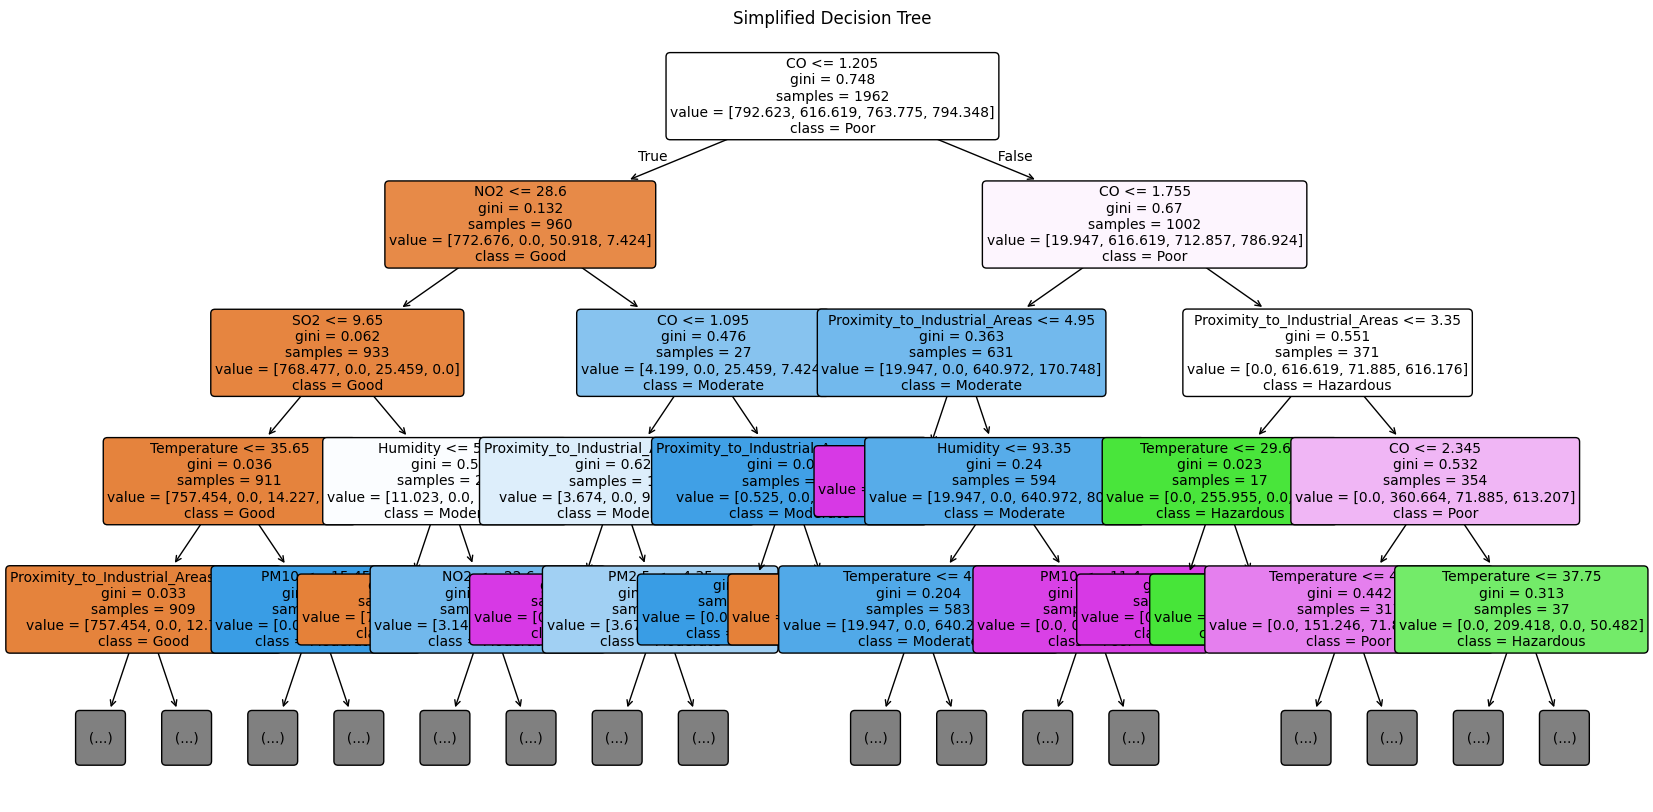

In [18]:
from sklearn.tree import plot_tree
estimator = rf.estimators_[1]

plt.figure(figsize=(20,10))
plot_tree(estimator,
          feature_names=features.columns,
          class_names=encoder.classes_,
          max_depth=4,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Simplified Decision Tree")
plt.show()

## Other

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold,cross_val_score,KFold

standazier=StandardScaler()

pipeline=make_pipeline(dummy)
kf=KFold(n_splits=10,shuffle=True,random_state=1)
skf=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
cv_results_kf=cross_val_score(pipeline,features,target,cv=kf,scoring='accuracy',n_jobs=-1)
cv_results_skf=cross_val_score(pipeline,features,target,cv=skf,scoring='accuracy',n_jobs=-1)
print(cv_results_kf)
print(cv_results_kf.mean())
print(cv_results_skf)
print(cv_results_skf.mean())


[0.35336538 0.37019231 0.36538462 0.37019231 0.38221154 0.35576923
 0.39423077 0.37740385 0.38313253 0.39036145]
0.37422439759036147
[0.34615385 0.39182692 0.35576923 0.37740385 0.37019231 0.39423077
 0.375      0.33173077 0.3686747  0.37108434]
0.368206672845227


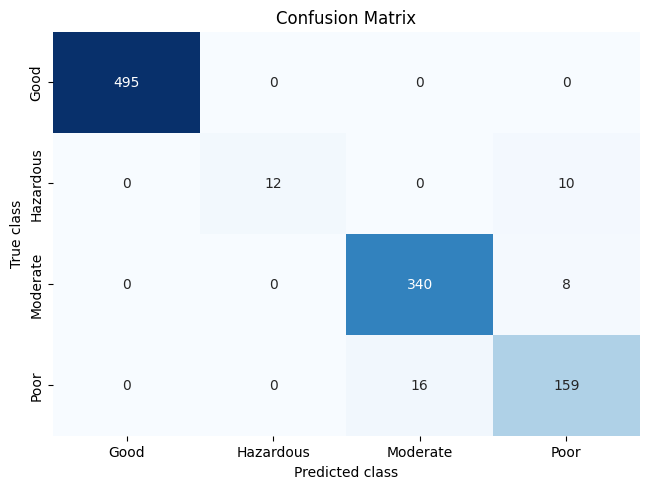

1255


In [20]:
from sklearn.ensemble import RandomForestClassifier
randomForest=RandomForestClassifier()
t= randomForest.fit(features_train,target_train).predict(features_test)
randomForest.score(features_test,target_test)
createConfusionMatrix(target_test,t)
print(t.sum())

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold,KFold,cross_val_score

standazier=StandardScaler()

pipeline=make_pipeline(randomForest)
kf=KFold(n_splits=10,shuffle=True,random_state=1)
skf=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
cv_results_kf=cross_val_score(pipeline,features,target,cv=kf,scoring='accuracy',n_jobs=-1)
cv_results_skf=cross_val_score(pipeline,features,target,cv=skf,scoring='accuracy',n_jobs=-1)
print(cv_results_kf)
print(cv_results_kf.mean())
print(cv_results_skf)
print(cv_results_skf.mean())

[0.96634615 0.96394231 0.96634615 0.95432692 0.95192308 0.97836538
 0.96875    0.97836538 0.96144578 0.95903614]
0.9648847312326229
[0.96875    0.97596154 0.95192308 0.95673077 0.95673077 0.97596154
 0.97836538 0.96153846 0.97590361 0.96385542]
0.9665720574606116


### Model - Random Forest

In [22]:
from sklearn.model_selection import train_test_split
x=df.drop(columns='Air Quality')
y=df['Air Quality']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf=RandomForestClassifier()
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,41)),
        'min_samples_leaf':list(np.arange(2,41)),'max_features':['sqrt','log2',None],'n_estimators':[400]}



In [24]:
nrf=RandomizedSearchCV(rf,param_distributions=params,random_state=20,cv=10,scoring='accuracy',n_jobs=-1)
nrf.fit(x_train,y_train)
print(nrf.best_params_)
print(nrf.best_score_)

nrf=nrf.best_estimator_

{'n_estimators': 400, 'min_samples_split': np.int64(10), 'min_samples_leaf': np.int64(4), 'max_features': 'log2', 'criterion': 'gini'}
0.9660298853069935


In [25]:
predt=nrf.predict(x_train)
pred=nrf.predict(x_test)

# Nastavak 

In [26]:
minmax_scale=preprocessing.MinMaxScaler(feature_range=(0,1))
df_minmax=df.copy()
for col in df.columns:
    if df[col].dtypes!=object:
        df_minmax[col]=minmax_scale.fit_transform(df[col].values.reshape(-1,1))
print(df_minmax.head())

   Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0     0.483776  0.304749  0.091873  0.283255  0.292621  0.523810  0.540404   
1     0.439528  0.522427  0.040636  0.194053  0.595420  0.540816  0.500000   
2     0.286136  0.510554  0.471731  0.532081  0.432570  0.639456  0.494949   
3     0.404130  0.040897  0.107774  0.101721  0.155216  0.391156  0.252525   
4     0.386431  0.457784  0.121908  0.253521  0.368957  0.401361  0.181818   

   Proximity_to_Industrial_Areas  Population_Density  Air Quality  
0                       0.224852            0.194651     0.666667  
1                       0.207101            0.628529     0.666667  
2                       0.159763            0.640416     0.666667  
3                       0.508876            0.539376     0.000000  
4                       0.603550            0.170877     0.000000  


In [27]:
scaller=preprocessing.StandardScaler()
df_std=df.copy()
for col in df.columns:
    if df[col].dtypes!=object:
        df_std[col]=scaller.fit_transform(df[col].values.reshape(-1,1))
print(df_std.head())

   Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0     0.208528 -0.572424 -0.684376 -0.302789 -0.747481  0.155763  0.852370   
1    -0.057517  0.557506 -0.924151 -0.708591  0.856706  0.255309  0.663646   
2    -0.979808  0.495873  1.093263  0.829185 -0.006050  0.832674  0.640056   
3    -0.270354 -1.942035 -0.609963 -1.128632 -1.475431 -0.620693 -0.492284   
4    -0.376772  0.221951 -0.543819 -0.438056 -0.343064 -0.560965 -0.822550   

   Proximity_to_Industrial_Areas  Population_Density  Air Quality  
0                      -0.790460           -1.079606     0.669851  
1                      -0.878203            1.008238     0.669851  
2                      -1.112184            1.065440     0.669851  
3                       0.613427            0.579229    -0.993475  
4                       1.081389           -1.194008    -0.993475  
